<a href="https://colab.research.google.com/github/shreyansh273/GTx_6501/blob/main/Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving credit_card_data-headers.txt to credit_card_data-headers.txt


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_all = pd.read_csv("credit_card_data-headers.txt", sep='\t')

In [16]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      654 non-null    int64  
 1   A2      654 non-null    float64
 2   A3      654 non-null    float64
 3   A8      654 non-null    float64
 4   A9      654 non-null    int64  
 5   A10     654 non-null    int64  
 6   A11     654 non-null    int64  
 7   A12     654 non-null    int64  
 8   A14     654 non-null    int64  
 9   A15     654 non-null    int64  
 10  R1      654 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 56.3 KB


In [6]:
data_all.head()

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
0,1,30.83,0.000,1.25,1,0,1,1,202,0,1
1,0,58.67,4.460,3.04,1,0,6,1,43,560,1
2,0,24.50,0.500,1.50,1,1,0,1,280,824,1
3,1,27.83,1.540,3.75,1,0,5,0,100,3,1
4,1,20.17,5.625,1.71,1,1,0,1,120,0,1


In [7]:
data_all.describe()

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,0.689602,31.578349,4.830558,2.241690,0.535168,0.561162,2.498471,0.538226,180.084098,1012.730887,0.452599
std,0.463010,11.981789,5.023295,3.369197,0.499143,0.496625,4.965655,0.498918,168.315719,5249.320660,0.498129
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.580000,1.040000,0.165000,0.000000,0.000000,0.000000,0.000000,70.750000,0.000000,0.000000
50%,1.000000,28.460000,2.855000,1.000000,1.000000,1.000000,0.000000,1.000000,160.000000,5.000000,0.000000
75%,1.000000,38.250000,7.437500,2.615000,1.000000,1.000000,3.000000,1.000000,271.000000,399.000000,1.000000
max,1.000000,80.250000,28.000000,28.500000,1.000000,1.000000,67.000000,1.000000,2000.000000,100000.000000,1.000000


In [8]:
data_all.isna().sum()

A1     0
A2     0
A3     0
A8     0
A9     0
A10    0
A11    0
A12    0
A14    0
A15    0
R1     0
dtype: int64

In [9]:
data_all["R1"].value_counts()

0    358
1    296
Name: R1, dtype: int64

In [18]:
binary_cols = ["A1","A9","A10","A12"]
num_cols = ["A2","A2","A3","A8","A11","A14","A15"]

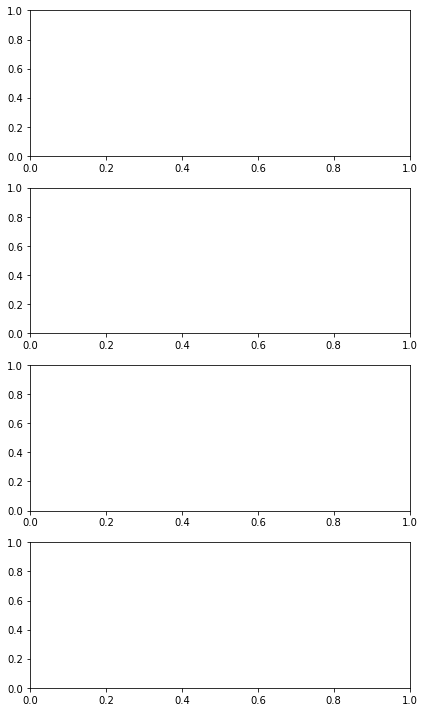

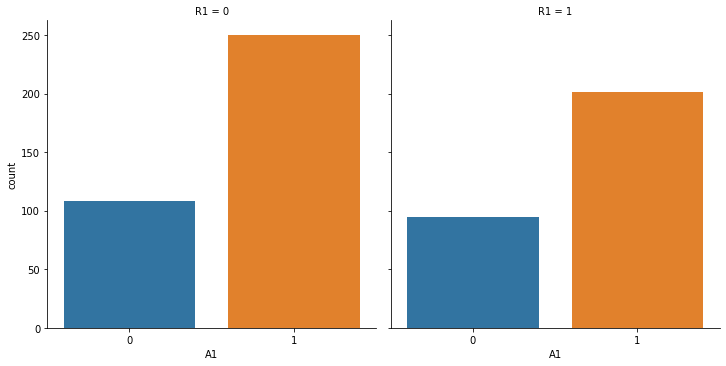

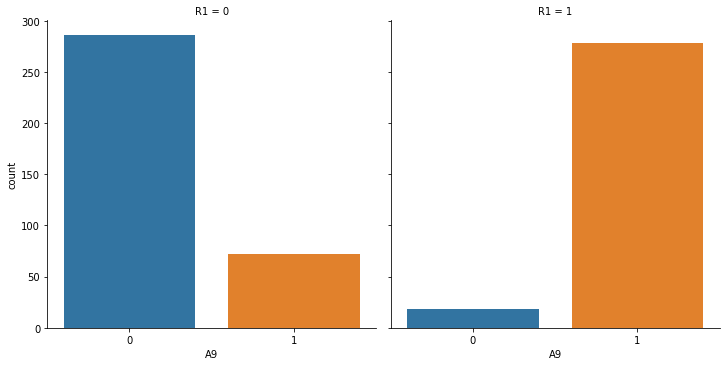

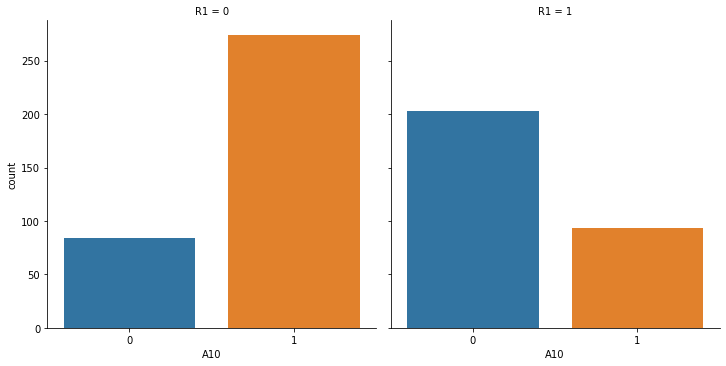

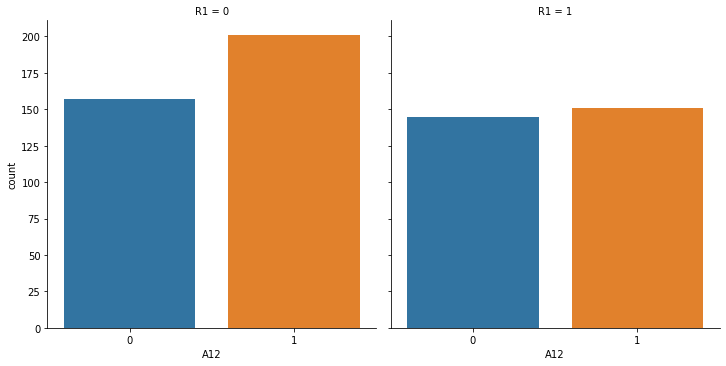

In [26]:
n_rows = len(binary_cols)
n_cols = 1
fig,ax = plt.subplots(n_rows, n_cols, figsize=(6,10))
fig.tight_layout()
for row_num in range(n_rows):
  sns.catplot(x=binary_cols[row_num], data=data_all, kind="count", col="R1")

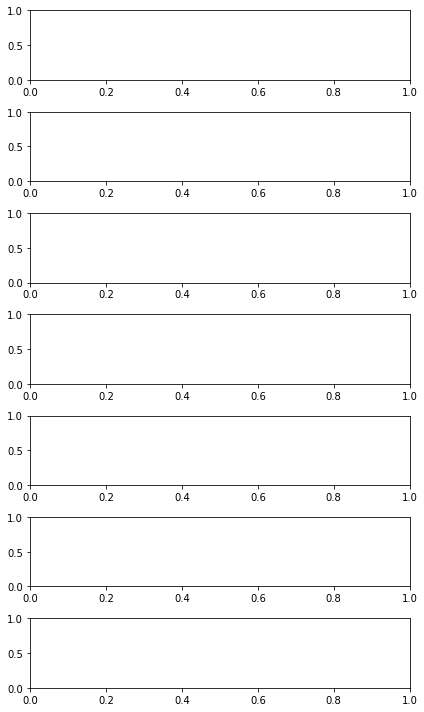

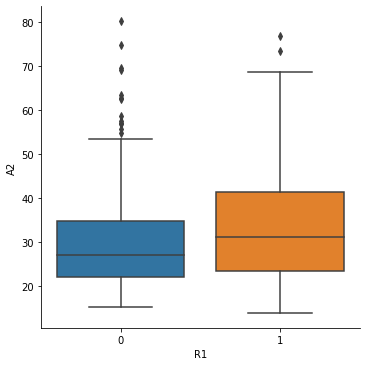

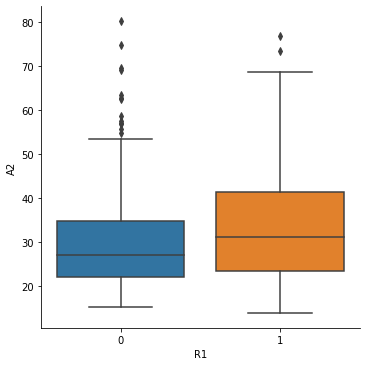

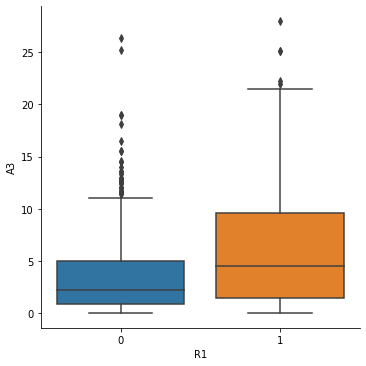

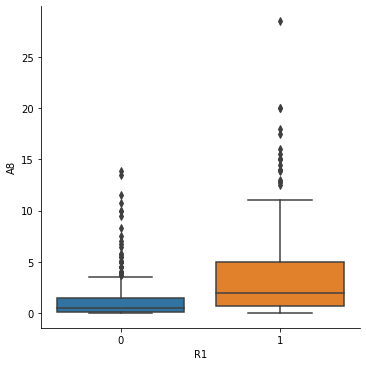

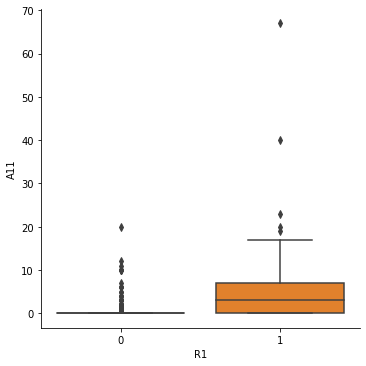

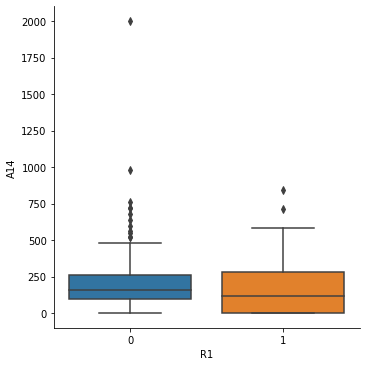

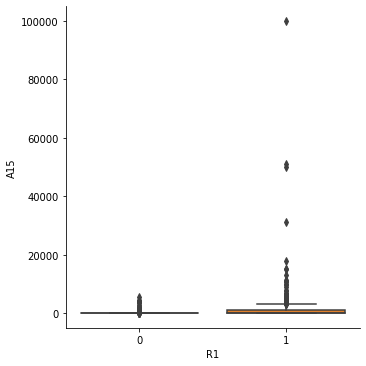

In [29]:
n_rows = len(num_cols)
n_cols = 1
fig,ax = plt.subplots(n_rows, n_cols, figsize=(6,10))
fig.tight_layout()
for row_num in range(n_rows):
  sns.catplot(x="R1", y=num_cols[row_num], data=data_all, kind="box")

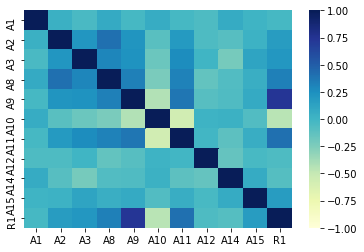

In [50]:
sns.heatmap(data_all.corr(method='pearson'), cmap='YlGnBu', vmin=-1)

In [51]:
data_all.corr()

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
A1,1.000000,0.045802,-0.034756,0.084334,-0.022270,0.066039,-0.017192,-0.051311,0.076422,0.012962,-0.020732
A2,0.045802,1.000000,0.215737,0.409101,0.221511,-0.096747,0.192456,-0.051588,-0.090133,0.027909,0.172183
A3,-0.034756,0.215737,1.000000,0.300434,0.236780,-0.165810,0.269675,0.006268,-0.217101,0.119724,0.206766
A8,0.084334,0.409101,0.300434,1.000000,0.335137,-0.228538,0.327587,-0.139915,-0.063883,0.052247,0.333156
A9,-0.022270,0.221511,0.236780,0.335137,1.000000,-0.428780,0.377221,-0.088423,-0.058665,0.084187,0.736572
A10,0.066039,-0.096747,-0.165810,-0.228538,-0.428780,1.000000,-0.569406,0.021452,0.037486,-0.068321,-0.452540
A11,-0.017192,0.192456,0.269675,0.327587,0.377221,-0.569406,1.000000,-0.006467,-0.115151,0.058494,0.406417
A12,-0.051311,-0.051588,0.006268,-0.139915,-0.088423,0.021452,-0.006467,1.000000,-0.141013,-0.027698,-0.051236
A14,0.076422,-0.090133,-0.217101,-0.063883,-0.058665,0.037486,-0.115151,-0.141013,1.000000,0.073529,-0.083597
A15,0.012962,0.027909,0.119724,0.052247,0.084187,-0.068321,0.058494,-0.027698,0.073529,1.000000,0.172833


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
X = data_all.drop("R1", axis=1)
y = data_all["R1"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52, stratify=y)

In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled

array([[0.        , 0.13789474, 0.41375   , ..., 1.        , 0.04      ,
        0.01349   ],
       [1.        , 0.10030075, 0.25      , ..., 1.        , 0.1       ,
        0.01391   ],
       [0.        , 0.08150376, 0.30660714, ..., 1.        , 0.048     ,
        0.        ],
       ...,
       [1.        , 0.2793985 , 0.26785714, ..., 0.        , 0.21      ,
        0.        ],
       [0.        , 0.40721805, 0.35714286, ..., 1.        , 0.0145    ,
        0.00837   ],
       [1.        , 0.21804511, 0.03125   , ..., 0.        , 0.198     ,
        0.        ]])

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)

In [60]:
print(logreg.score(X_train_scaled, y_train))
print(logreg.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

0.8599562363238512
0.868020304568528
[[87 21]
 [ 5 84]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       108
           1       0.80      0.94      0.87        89

    accuracy                           0.87       197
   macro avg       0.87      0.87      0.87       197
weighted avg       0.88      0.87      0.87       197



In [53]:
logreg.coef_

array([[-0.07223683, -0.24407108, -0.11546937,  0.95757664,  3.42712094,
        -1.1836227 ,  0.9325032 ,  0.10295424, -0.61284919,  1.36563938]])

In [62]:
from sklearn.svm import SVC

In [64]:
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)
svc_pred = svc.predict(X_test)

In [74]:
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[55 53]
 [15 74]]
              precision    recall  f1-score   support

           0       0.79      0.51      0.62       108
           1       0.58      0.83      0.69        89

    accuracy                           0.65       197
   macro avg       0.68      0.67      0.65       197
weighted avg       0.69      0.65      0.65       197

